In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("/content/YesBank_StockPrices.csv")
df.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [210]:
df1=df.reset_index()['High']
df1

0      14.00
1      14.88
2      14.87
3      14.47
4      13.88
       ...  
180    28.30
181    17.16
182    15.34
183    14.01
184    14.90
Name: High, Length: 185, dtype: float64

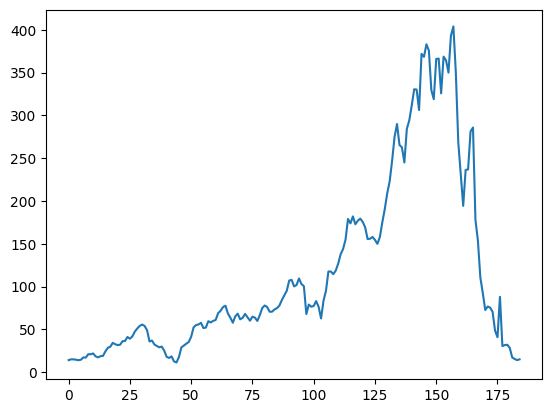

In [211]:
plt.plot(df1)


In [212]:
df1

0      14.00
1      14.88
2      14.87
3      14.47
4      13.88
       ...  
180    28.30
181    17.16
182    15.34
183    14.01
184    14.90
Name: High, Length: 185, dtype: float64

In [213]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

print(df1)

[[0.00702719]
 [0.00926775]
 [0.00924229]
 [0.00822385]
 [0.00672166]
 [0.00814747]
 [0.01507282]
 [0.01458906]
 [0.02472248]
 [0.02434056]
 [0.02688665]
 [0.01822996]
 [0.01517466]
 [0.01873918]
 [0.01945208]
 [0.03299725]
 [0.04386903]
 [0.04689887]
 [0.05835625]
 [0.05438436]
 [0.05178735]
 [0.05283125]
 [0.06339749]
 [0.06400855]
 [0.07587331]
 [0.0706793 ]
 [0.07768103]
 [0.09181179]
 [0.10118138]
 [0.10887056]
 [0.11284245]
 [0.10879417]
 [0.09588553]
 [0.06253183]
 [0.0652816 ]
 [0.05341684]
 [0.04903758]
 [0.04516753]
 [0.04725532]
 [0.03503412]
 [0.01670231]
 [0.01354517]
 [0.0180772 ]
 [0.00320807]
 [0.        ]
 [0.01596395]
 [0.04481108]
 [0.05051431]
 [0.05581016]
 [0.06095325]
 [0.07653529]
 [0.10464406]
 [0.11136572]
 [0.11312252]
 [0.11798554]
 [0.10245443]
 [0.10393115]
 [0.1228231 ]
 [0.11925858]
 [0.12389245]
 [0.12654038]
 [0.14675629]
 [0.15403809]
 [0.16488441]
 [0.16895814]
 [0.14543233]
 [0.1331602 ]
 [0.11826561]
 [0.1373867 ]
 [0.14517772]
 [0.12842448]
 [0.13

In [214]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [215]:
training_size,test_size

(120, 65)

In [216]:
train_data

array([[0.00702719],
       [0.00926775],
       [0.00924229],
       [0.00822385],
       [0.00672166],
       [0.00814747],
       [0.01507282],
       [0.01458906],
       [0.02472248],
       [0.02434056],
       [0.02688665],
       [0.01822996],
       [0.01517466],
       [0.01873918],
       [0.01945208],
       [0.03299725],
       [0.04386903],
       [0.04689887],
       [0.05835625],
       [0.05438436],
       [0.05178735],
       [0.05283125],
       [0.06339749],
       [0.06400855],
       [0.07587331],
       [0.0706793 ],
       [0.07768103],
       [0.09181179],
       [0.10118138],
       [0.10887056],
       [0.11284245],
       [0.10879417],
       [0.09588553],
       [0.06253183],
       [0.0652816 ],
       [0.05341684],
       [0.04903758],
       [0.04516753],
       [0.04725532],
       [0.03503412],
       [0.01670231],
       [0.01354517],
       [0.0180772 ],
       [0.00320807],
       [0.        ],
       [0.01596395],
       [0.04481108],
       [0.050

In [217]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [218]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [219]:
print(X_train.shape), print(y_train.shape)

(69, 50)
(69,)


(None, None)

In [220]:
print(X_test.shape), print(ytest.shape)

(14, 50)
(14,)


(None, None)

In [221]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [222]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [223]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1), activation='sigmoid'))
model.add(LSTM(50, return_sequences=True, activation='sigmoid'))
model.add(LSTM(50, activation='sigmoid'))
model.add(Dense(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_52 (LSTM)              (None, 50, 50)            20200     
                                                                 
 lstm_53 (LSTM)              (None, 50)                20200     
                                                                 
 dense_28 (Dense)            (None, 1)                 51        
                                                                 
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 50,853
Trainable params: 50,853
Non-trainable params: 0
_________________________________________________________________


In [224]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
2/2 [==============================] - 6s 590ms/step - loss: 0.4728 - val_loss: 0.1749
Epoch 2/50
2/2 [==============================] - 0s 119ms/step - loss: 0.2710 - val_loss: 0.0671
Epoch 3/50
2/2 [==============================] - 0s 108ms/step - loss: 0.1311 - val_loss: 0.0135
Epoch 4/50
2/2 [==============================] - 0s 120ms/step - loss: 0.0469 - val_loss: 0.0060
Epoch 5/50
2/2 [==============================] - 0s 112ms/step - loss: 0.0112 - val_loss: 0.0316
Epoch 6/50
2/2 [==============================] - 0s 107ms/step - loss: 0.0119 - val_loss: 0.0676
Epoch 7/50
2/2 [==============================] - 0s 107ms/step - loss: 0.0299 - val_loss: 0.0909
Epoch 8/50
2/2 [==============================] - 0s 120ms/step - loss: 0.0438 - val_loss: 0.0934
Epoch 9/50
2/2 [==============================] - 0s 110ms/step - loss: 0.0451 - val_loss: 0.0813
Epoch 10/50
2/2 [==============================] - 0s 108ms/step - loss: 0.0371 - val_loss: 0.0619
Epoch 11/50
2/2 [==

In [225]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

test_predict

1/1 [==============================] - 0s 37ms/step


array([[80.24791 ],
       [80.24016 ],
       [80.236824],
       [80.23244 ],
       [80.22822 ],
       [80.22139 ],
       [80.21746 ],
       [80.223145],
       [80.20993 ],
       [80.20967 ],
       [80.20721 ],
       [80.20463 ],
       [80.20096 ],
       [80.199165]], dtype=float32)

In [226]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

80.01897379954126

In [227]:
import numpy as np
import matplotlib.pyplot as plt


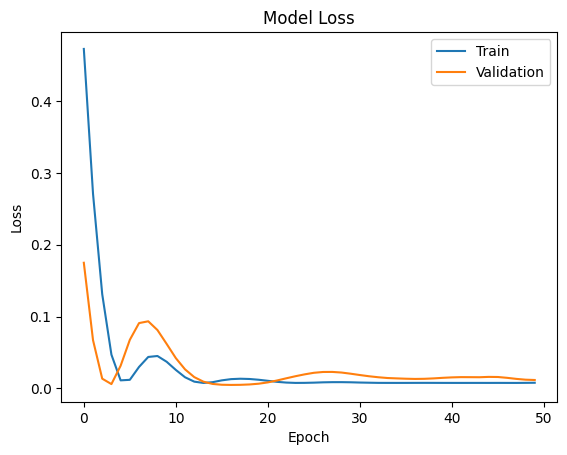

In [228]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
